https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series (Kaggle Database)

https://www.rottentomatoes.com/top/bestofrt/ (Rotter tomates top 100 movies)

In [1]:
#import relevant libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

import collections
import matplotlib.pyplot as plt
import seaborn as sns

# Films Rotten Tomatoes

In [2]:
# get the films data from Rotten Tomatoes top 100 movies website

url = "https://www.rottentomatoes.com/top/bestofrt/"
response = requests.get(url)
response

<Response [200]>

In [3]:
soup = BeautifulSoup(response.content, features = "lxml")
#print(soup.prettify())

In [4]:
movies = soup.find_all("table", {"class":"table"})
movies

data = []

for movie in movies:
    for row in movie.findAll('tr')[1:]:
        
        movie_names = row.findAll("a", {"class":"unstyled articleLink"})
        movie_name = movie_names[0].text.strip().capitalize()
        movie_name = movie_name[:len(movie_name) - 7]
        movie_name = re.sub('[^A-Za-z0-9 ]+', '', movie_name)
        
        movie_ratings = row.findAll("span", {"class":"tMeterScore"})
        movie_rating = movie_ratings[0].text
        movie_rating = re.sub('[^0-9 ]+', '', movie_rating)
        
        data.append({"Film name": movie_name, "Film Rating Rotten Tomatoes" : movie_rating})

#create the table with the relevant data from Rotten Tomatoes:
TopTomatoes = pd.DataFrame(data)
TopTomatoes["Film Rating Rotten Tomatoes"] = TopTomatoes["Film Rating Rotten Tomatoes"].apply(pd.to_numeric)
TopTomatoes

,Film name,Film Rating Rotten Tomatoes
0,It happened one night,99
1,Citizen kane,99
2,The wizard of oz,98
3,Modern times,98
4,Black panther,96
...,...,...
95,The battle of algiers la battaglia di algeri,99
96,Never rarely sometimes always,99
97,Baby driver,92
98,The godfather part ii,96


In [5]:
# Create the top 10 movies from Rotter Tomatoes

TopTomatoes = TopTomatoes.sort_values(by=["Film Rating Rotten Tomatoes"], ascending= False)
Top10Tomates = TopTomatoes.head(10)
Top10Tomates

,Film name,Film Rating Rotten Tomatoes
48,Seven samurai shichinin no samurai,100
73,The kid,100
65,Leave no trace,100
66,The maltese falcon,100
31,Rebecca,100
89,Shadow of a doubt,100
79,Laura,100
51,Singin in the rain,100
76,The adventures of robin hood,100
23,The philadelphia story,100


# Top Genres Rotten Tomatoes

In [6]:
# Extracting link for every movie from rotten tomatoes top 100
movie_url_list = []
for movie in movies:
    for row in movie.findAll('tr')[1:]:
        
        movie_link = row.a['href']
        movie_url = 'https://www.rottentomatoes.com' + row.a['href']
        movie_url_list.append(movie_url)
movie_url_list

['https://www.rottentomatoes.com/m/it_happened_one_night',
 'https://www.rottentomatoes.com/m/citizen_kane',
 'https://www.rottentomatoes.com/m/the_wizard_of_oz_1939',
 'https://www.rottentomatoes.com/m/modern_times',
 'https://www.rottentomatoes.com/m/black_panther_2018',
 'https://www.rottentomatoes.com/m/parasite_2019',
 'https://www.rottentomatoes.com/m/avengers_endgame',
 'https://www.rottentomatoes.com/m/1003707-casablanca',
 'https://www.rottentomatoes.com/m/knives_out',
 'https://www.rottentomatoes.com/m/us_2019',
 'https://www.rottentomatoes.com/m/toy_story_4',
 'https://www.rottentomatoes.com/m/lady_bird',
 'https://www.rottentomatoes.com/m/mission_impossible_fallout',
 'https://www.rottentomatoes.com/m/blackkklansman',
 'https://www.rottentomatoes.com/m/get_out',
 'https://www.rottentomatoes.com/m/the_irishman',
 'https://www.rottentomatoes.com/m/godfather',
 'https://www.rottentomatoes.com/m/mad_max_fury_road',
 'https://www.rottentomatoes.com/m/spider_man_into_the_spider_v

In [7]:
# Extracting genres of movies from rotten tomatoes top 100
rotten_genres = []
for link in movie_url_list:
    try:
        response = requests.get(link)
        soup = BeautifulSoup(response.content, features = 'lxml')
        # get the genre
        genre_link = soup.find_all('div', attrs = {'class': 'meta-value genre'})
        genre = genre_link[0].text.strip()
        genre = re.sub('[^A-Za-z0-9&,/ ]+', '', genre)
        genre = re.sub(' ', '', genre)
    
        # putting found genres into a list
        rotten_genres.append(genre)
    except:
        print(f'issue with this link - {link}')
print(rotten_genres)

['Comedy,Romance', 'Drama', 'Fantasy,Kids&family,Musical', 'Comedy', 'Fantasy,Action,Adventure', 'Drama,Comedy,Mystery&thriller', 'Fantasy,Action,Adventure,Scifi', 'Drama', 'Drama,Crime,Comedy,Mystery&thriller', 'Horror,Mystery&thriller', 'Adventure,Animation,Fantasy,Kids&family,Comedy', 'Drama,Comedy', 'Action,Adventure,Mystery&thriller', 'Drama,Crime,Comedy', 'Comedy,Horror,Mystery&thriller', 'Drama,Crime', 'Drama,Crime', 'Action,Adventure', 'Animation,Fantasy,Action,Comedy,Kids&family,Adventure', 'Drama', 'Drama,Lgbtq', 'Drama', 'Fantasy,Horror,Mystery&thriller', 'Comedy,Romance', 'Drama', 'Action,Adventure,Fantasy', 'Drama,Music,Romance', 'Fantasy,Animation,Comedy,Kids&family', 'Horror,Mystery&thriller', 'Drama', 'Drama,Comedy', 'Mystery&thriller', 'Fantasy,Action,Adventure', 'Comedy,Lgbtq', 'Comedy', 'History,Drama,Romance,Lgbtq', 'Animation,Music,Comedy,Kids&family,Adventure', 'Drama,War,History', 'Fantasy,Action,Adventure,Scifi', 'Comedy', 'Fantasy,Romance', 'Fantasy,Action,Come

In [8]:
# We received list with multiple genres for each movie, trying to clean it better
rot_gen = []
for item in rotten_genres:
    item = item.split(',')
    rot_gen.append(item)
print(rot_gen)

[['Comedy', 'Romance'], ['Drama'], ['Fantasy', 'Kids&family', 'Musical'], ['Comedy'], ['Fantasy', 'Action', 'Adventure'], ['Drama', 'Comedy', 'Mystery&thriller'], ['Fantasy', 'Action', 'Adventure', 'Scifi'], ['Drama'], ['Drama', 'Crime', 'Comedy', 'Mystery&thriller'], ['Horror', 'Mystery&thriller'], ['Adventure', 'Animation', 'Fantasy', 'Kids&family', 'Comedy'], ['Drama', 'Comedy'], ['Action', 'Adventure', 'Mystery&thriller'], ['Drama', 'Crime', 'Comedy'], ['Comedy', 'Horror', 'Mystery&thriller'], ['Drama', 'Crime'], ['Drama', 'Crime'], ['Action', 'Adventure'], ['Animation', 'Fantasy', 'Action', 'Comedy', 'Kids&family', 'Adventure'], ['Drama'], ['Drama', 'Lgbtq'], ['Drama'], ['Fantasy', 'Horror', 'Mystery&thriller'], ['Comedy', 'Romance'], ['Drama'], ['Action', 'Adventure', 'Fantasy'], ['Drama', 'Music', 'Romance'], ['Fantasy', 'Animation', 'Comedy', 'Kids&family'], ['Horror', 'Mystery&thriller'], ['Drama'], ['Drama', 'Comedy'], ['Mystery&thriller'], ['Fantasy', 'Action', 'Adventure'],

In [9]:
r_g = []
for string in rot_gen:
    for word in string:
        word = word.split(',')
        #word = word.split('&')
        r_g.append(word)
print(r_g)

[['Comedy'], ['Romance'], ['Drama'], ['Fantasy'], ['Kids&family'], ['Musical'], ['Comedy'], ['Fantasy'], ['Action'], ['Adventure'], ['Drama'], ['Comedy'], ['Mystery&thriller'], ['Fantasy'], ['Action'], ['Adventure'], ['Scifi'], ['Drama'], ['Drama'], ['Crime'], ['Comedy'], ['Mystery&thriller'], ['Horror'], ['Mystery&thriller'], ['Adventure'], ['Animation'], ['Fantasy'], ['Kids&family'], ['Comedy'], ['Drama'], ['Comedy'], ['Action'], ['Adventure'], ['Mystery&thriller'], ['Drama'], ['Crime'], ['Comedy'], ['Comedy'], ['Horror'], ['Mystery&thriller'], ['Drama'], ['Crime'], ['Drama'], ['Crime'], ['Action'], ['Adventure'], ['Animation'], ['Fantasy'], ['Action'], ['Comedy'], ['Kids&family'], ['Adventure'], ['Drama'], ['Drama'], ['Lgbtq'], ['Drama'], ['Fantasy'], ['Horror'], ['Mystery&thriller'], ['Comedy'], ['Romance'], ['Drama'], ['Action'], ['Adventure'], ['Fantasy'], ['Drama'], ['Music'], ['Romance'], ['Fantasy'], ['Animation'], ['Comedy'], ['Kids&family'], ['Horror'], ['Mystery&thriller'],

In [10]:
# Finally a list with genres from rotten tomatoes
rg = [i for element in r_g for i in element]
print(rg)

['Comedy', 'Romance', 'Drama', 'Fantasy', 'Kids&family', 'Musical', 'Comedy', 'Fantasy', 'Action', 'Adventure', 'Drama', 'Comedy', 'Mystery&thriller', 'Fantasy', 'Action', 'Adventure', 'Scifi', 'Drama', 'Drama', 'Crime', 'Comedy', 'Mystery&thriller', 'Horror', 'Mystery&thriller', 'Adventure', 'Animation', 'Fantasy', 'Kids&family', 'Comedy', 'Drama', 'Comedy', 'Action', 'Adventure', 'Mystery&thriller', 'Drama', 'Crime', 'Comedy', 'Comedy', 'Horror', 'Mystery&thriller', 'Drama', 'Crime', 'Drama', 'Crime', 'Action', 'Adventure', 'Animation', 'Fantasy', 'Action', 'Comedy', 'Kids&family', 'Adventure', 'Drama', 'Drama', 'Lgbtq', 'Drama', 'Fantasy', 'Horror', 'Mystery&thriller', 'Comedy', 'Romance', 'Drama', 'Action', 'Adventure', 'Fantasy', 'Drama', 'Music', 'Romance', 'Fantasy', 'Animation', 'Comedy', 'Kids&family', 'Horror', 'Mystery&thriller', 'Drama', 'Drama', 'Comedy', 'Mystery&thriller', 'Fantasy', 'Action', 'Adventure', 'Comedy', 'Lgbtq', 'Comedy', 'History', 'Drama', 'Romance', 'Lgbt

In [11]:
# Creating a dictionary with frequency of each genre in rotten tomatoes top 100
genre_freq={}
for word in rg:
    if word in genre_freq:
        genre_freq[word]+=1
    else:
        genre_freq[word]=1
print(genre_freq)

{'Comedy': 32, 'Romance': 9, 'Drama': 48, 'Fantasy': 18, 'Kids&family': 11, 'Musical': 5, 'Action': 17, 'Adventure': 22, 'Mystery&thriller': 20, 'Scifi': 10, 'Crime': 10, 'Horror': 8, 'Animation': 8, 'Lgbtq': 4, 'Music': 3, 'History': 8, 'War': 5, 'Biography': 1}


In [12]:
# Here we have a dataframe to visualize genres

data_items = genre_freq.items()
data_list = list(data_items)

rottentotomatoes_genres = pd.DataFrame(data_list, columns = ['Genre', 'Popularity'])
rottentotomatoes_genres

,Genre,Popularity
0,Comedy,32
1,Romance,9
2,Drama,48
3,Fantasy,18
4,Kids&family,11
5,Musical,5
6,Action,17
7,Adventure,22
8,Mystery&thriller,20
9,Scifi,10


In [13]:
# Our goal to see top 3 genres what critics choose

rottentotomatoes_genres = rottentotomatoes_genres.sort_values(by=['Popularity'], ascending=False)
rottentotomatoes_genres = rottentotomatoes_genres.head(3)
rottentotomatoes_genres

,Genre,Popularity
2,Drama,48
0,Comedy,32
7,Adventure,22


In [14]:
# Moving column Genre as an index for better vizualization on chart

rottentotomatoes_genres = rottentotomatoes_genres.set_index('Genre')

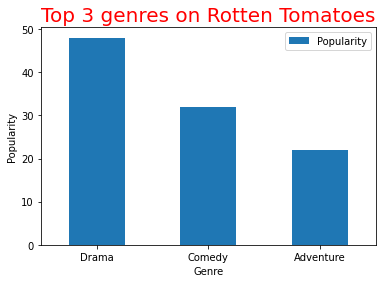

In [15]:
# Chart of Top 3 genres on Rotten Tomatoes

rottentotomatoes_genres.plot(kind='bar')
plt.title('Top 3 genres on Rotten Tomatoes', color = 'red', size = '20')
plt.xticks(rotation=0)
plt.ylabel('Popularity')
plt.show()

# Working on the IMDB data

In [16]:
#IMDM datasource
imdb = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\Projects\\Final Project - Module 1\\Project-Week-3-Data-Thieves\\your-project\\imdb.csv")
imdb

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In [17]:
#IMDB data cleaning
imdb = imdb.drop_duplicates(subset=['Name'])
imdb = imdb[imdb["Type"] == "Film"]
imdb = imdb[imdb["Rate"] != "No Rate"]
imdb

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In [18]:
#imdb.info() - Verify that both columns Values and Rates were objects

imdb.Votes = imdb.Votes.str.replace(",", "") #to replace the comma in the Votes column

imdb[["Votes", "Rate"]] = imdb[["Votes", "Rate"]].apply(pd.to_numeric) #change the type of the both columns
imdb

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448,"Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In [19]:
#IMDB follow a rule that movies only count for the tops if they have more 25 thousand
imdb = imdb[imdb["Votes"] >= 25000]
imdb

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Chugyeokja,2008,7.8,62423,"Action, Crime, Thriller",125,Film,Not Rated,-,Mild,Severe,Moderate,Mild,Severe
5023,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448,"Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe


In [20]:
#appy regex to the film name to clean it as match 
imdb["Name"] = imdb["Name"].str.replace(r'[^A-Za-z0-9 ]+', "")
imdb

C:\Users\beatr\AppData\Local\Temp/ipykernel_5048/512761225.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb["Name"] = imdb["Name"].str.replace(r'[^A-Za-z0-9 ]+', "")
C:\Users\beatr\AppData\Local\Temp/ipykernel_5048/512761225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["Name"] = imdb["Name"].str.replace(r'[^A-Za-z0-9 ]+', "")


,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Chugyeokja,2008,7.8,62423,"Action, Crime, Thriller",125,Film,Not Rated,-,Mild,Severe,Moderate,Mild,Severe
5023,The Human Centipede II Full Sequence,2011,3.8,37492,Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448,"Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
5025,Before the Devil Knows Youre Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe


# Films IMDB

In [21]:
#Create a new data set with only the necessary columns

new_imdb = imdb[["Name", "Rate", "Genre"]]
new_imdb

,Name,Rate,Genre
0,No Time to Die,7.6,"Action, Adventure, Thriller"
1,The Guilty,6.3,"Crime, Drama, Thriller"
2,The Many Saints of Newark,6.4,"Crime, Drama"
3,Venom Let There Be Carnage,6.4,"Action, Adventure, Sci-Fi"
4,Dune,8.3,"Action, Adventure, Drama"
...,...,...,...
5021,Chugyeokja,7.8,"Action, Crime, Thriller"
5023,The Human Centipede II Full Sequence,3.8,Horror
5024,Double Indemnity,8.3,"Crime, Drama, Film-Noir"
5025,Before the Devil Knows Youre Dead,7.3,"Crime, Drama, Thriller"


In [22]:
#Replace those movies write wrong names
new_imdb["Name"] = new_imdb["Name"].replace(to_replace ="Gisaengchung", value ="Parasite Gisaengchung")
new_imdb["Name"] = new_imdb["Name"].replace(to_replace ="Shichinin no samurai", value ="Seven Samurai Shichinin no Samurai")
new_imdb["Name"] = new_imdb["Name"].replace(to_replace ="Sunset Blvd", value ="Sunset Boulevard")
new_imdb

#new_imdb.to_excel("new_imdb.xlsx")

C:\Users\beatr\AppData\Local\Temp/ipykernel_5048/2330577059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_imdb["Name"] = new_imdb["Name"].replace(to_replace ="Gisaengchung", value ="Parasite Gisaengchung")
C:\Users\beatr\AppData\Local\Temp/ipykernel_5048/2330577059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_imdb["Name"] = new_imdb["Name"].replace(to_replace ="Shichinin no samurai", value ="Seven Samurai Shichinin no Samurai")
C:\Users\beatr\AppData\Local\Temp/ipykernel_5048/2330577059

,Name,Rate,Genre
0,No Time to Die,7.6,"Action, Adventure, Thriller"
1,The Guilty,6.3,"Crime, Drama, Thriller"
2,The Many Saints of Newark,6.4,"Crime, Drama"
3,Venom Let There Be Carnage,6.4,"Action, Adventure, Sci-Fi"
4,Dune,8.3,"Action, Adventure, Drama"
...,...,...,...
5021,Chugyeokja,7.8,"Action, Crime, Thriller"
5023,The Human Centipede II Full Sequence,3.8,Horror
5024,Double Indemnity,8.3,"Crime, Drama, Film-Noir"
5025,Before the Devil Knows Youre Dead,7.3,"Crime, Drama, Thriller"


In [23]:
# Add the sorts so that we can extract the ones that we want
new_imdb = new_imdb.sort_values(by=["Rate",'Name'], ascending=False)
new_imdb['Name'] = new_imdb['Name'].str.capitalize() #change the name columns for better match with RT data

In [24]:
#Creating our own IMDB top 100 

TopImdb = new_imdb.head(100)

TopImdb = TopImdb.rename(columns={"Name": "Film name", "Rate": "Film Rating IMDB", "Genre": "Genre"})
TopImdb

#TopImdb.to_excel("TopImdb.xlsx")  

,Film name,Film Rating IMDB,Genre
201,The shawshank redemption,9.3,Drama
251,The godfather,9.2,"Crime, Drama"
929,The godfather part ii,9.0,"Crime, Drama"
270,The dark knight,9.0,"Action, Crime, Drama"
839,12 angry men,9.0,"Crime, Drama"
...,...,...,...
1627,Le fabuleux destin damlie poulain,8.3,"Comedy, Romance"
2572,Lawrence of arabia,8.3,"Adventure, Biography, Drama"
1156,Kimetsu no yaiba mugen resshahen,8.3,"Animation, Action, Adventure"
4700,Jodaeiye nader az simin,8.3,Drama


# Top of the tops

In [25]:
#Inner Join - merge the two top 100 to get the movies in both tops:
Bothrakings = pd.merge(TopImdb, TopTomatoes, left_on='Film name', right_on='Film name')
Bothrakings.head(100)

#Conclusion:
#the critics and the viewers have different movies tastes as we found only 15 movies matching both the two top 100 movies

,Film name,Film Rating IMDB,Genre,Film Rating Rotten Tomatoes
0,The godfather,9.2,"Crime, Drama",97
1,The godfather part ii,9.0,"Crime, Drama",96
2,Seven samurai shichinin no samurai,8.6,"Action, Adventure, Drama",100
3,Parasite gisaengchung,8.6,"Comedy, Drama, Thriller",98
4,Rear window,8.5,"Mystery, Thriller",98
5,Psycho,8.5,"Horror, Mystery, Thriller",96
6,Casablanca,8.5,"Drama, Romance, War",99
7,Sunset boulevard,8.4,"Drama, Film-Noir",98
8,Spiderman into the spiderverse,8.4,"Animation, Action, Adventure",97
9,Coco,8.4,"Animation, Adventure, Comedy",97


In [27]:
#Creating our own IMDB top 10

Top10Imdb = new_imdb.head(10)
Top10Imdb

,Name,Rate,Genre
201,The shawshank redemption,9.3,Drama
251,The godfather,9.2,"Crime, Drama"
929,The godfather part ii,9.0,"Crime, Drama"
270,The dark knight,9.0,"Action, Crime, Drama"
839,12 angry men,9.0,"Crime, Drama"
816,The lord of the rings the return of the king,8.9,"Action, Adventure, Drama"
555,Schindlers list,8.9,"Biography, Drama, History"
320,Pulp fiction,8.9,"Crime, Drama"
341,The lord of the rings the fellowship of the ring,8.8,"Action, Adventure, Drama"
318,Inception,8.8,"Action, Adventure, Sci-Fi"


# Top Genres of IMDB

In [28]:
#TopImdb["Genre"] = TopImdb["Genre"].apply(lambda x: list(x.split(",")))

TopImdb["Genre"]

list_genres_imdb =[] 

for item in TopImdb["Genre"]:
    list_genres_imdb.append(item)

list_new = []

for element in list_genres_imdb:
    #print(type(element))
    element = element.split(",")
    #print(element)
    list_new.append(element)
    
list_newnew = [word.upper().strip() for element in list_new for word in element]

#get the list with all genres and separe them for 1 item in the list being one genre
print(list_newnew)

['DRAMA', 'CRIME', 'DRAMA', 'CRIME', 'DRAMA', 'ACTION', 'CRIME', 'DRAMA', 'CRIME', 'DRAMA', 'ACTION', 'ADVENTURE', 'DRAMA', 'BIOGRAPHY', 'DRAMA', 'HISTORY', 'CRIME', 'DRAMA', 'ACTION', 'ADVENTURE', 'DRAMA', 'ACTION', 'ADVENTURE', 'SCI-FI', 'WESTERN', 'DRAMA', 'ROMANCE', 'DRAMA', 'ACTION', 'SCI-FI', 'ACTION', 'ADVENTURE', 'DRAMA', 'ACTION', 'ADVENTURE', 'FANTASY', 'ACTION', 'BIOGRAPHY', 'DRAMA', 'DRAMA', 'BIOGRAPHY', 'CRIME', 'DRAMA', 'COMEDY', 'DRAMA', 'MUSIC', 'CRIME', 'DRAMA', 'THRILLER', 'CRIME', 'DRAMA', 'FANTASY', 'ACTION', 'ADVENTURE', 'FANTASY', 'ACTION', 'ADVENTURE', 'DRAMA', 'ACTION', 'DRAMA', 'MYSTERY', 'ANIMATION', 'ADVENTURE', 'FAMILY', 'CRIME', 'DRAMA', 'MYSTERY', 'DRAMA', 'WAR', 'COMEDY', 'DRAMA', 'THRILLER', 'COMEDY', 'DRAMA', 'ROMANCE', 'DRAMA', 'FAMILY', 'FANTASY', 'ADVENTURE', 'DRAMA', 'SCI-FI', 'CRIME', 'DRAMA', 'DRAMA', 'MUSIC', 'CRIME', 'MYSTERY', 'THRILLER', 'DRAMA', 'MYSTERY', 'SCI-FI', 'BIOGRAPHY', 'DRAMA', 'MUSIC', 'ANIMATION', 'ADVENTURE', 'DRAMA', 'BIOGRAPHY'

In [29]:
# initialize a null list
unique_list = []
     
# traverse for all elements
for x in list_newnew:
    # check if exists in unique_list or not
    if x not in unique_list:
        unique_list.append(x)
    
print(unique_list)

['DRAMA', 'CRIME', 'ACTION', 'ADVENTURE', 'BIOGRAPHY', 'HISTORY', 'SCI-FI', 'WESTERN', 'ROMANCE', 'FANTASY', 'COMEDY', 'MUSIC', 'THRILLER', 'MYSTERY', 'ANIMATION', 'FAMILY', 'WAR', 'HORROR', 'FILM-NOIR', 'MUSICAL']


In [30]:
# Get a dictionary with the counts by Genre

occurrences = collections.Counter(list_newnew)
occurrences

Counter({'DRAMA': 69,
         'CRIME': 24,
         'ACTION': 25,
         'ADVENTURE': 24,
         'BIOGRAPHY': 8,
         'HISTORY': 3,
         'SCI-FI': 9,
         'WESTERN': 3,
         'ROMANCE': 8,
         'FANTASY': 7,
         'COMEDY': 14,
         'MUSIC': 3,
         'THRILLER': 13,
         'MYSTERY': 14,
         'ANIMATION': 10,
         'FAMILY': 3,
         'WAR': 5,
         'HORROR': 4,
         'FILM-NOIR': 1,
         'MUSICAL': 1})

In [31]:
#transfor the counting of genres to a DataFrame
df_genres_imdb = pd.DataFrame.from_dict(occurrences, orient='index').reset_index()
df_genres_imdb = df_genres_imdb.rename(columns={'index':'Genres IMDB', 0:'count'})
df_genres_imdb = df_genres_imdb.sort_values(by=["count"], ascending=False)
df_genres_imdb

,Genres IMDB,count
0,DRAMA,69
2,ACTION,25
1,CRIME,24
3,ADVENTURE,24
13,MYSTERY,14
10,COMEDY,14
12,THRILLER,13
14,ANIMATION,10
6,SCI-FI,9
8,ROMANCE,8


In [32]:
#Transform the genres imdb to capitalize and not upper
df_genres_imdb['Genres IMDB'] = df_genres_imdb['Genres IMDB'].str.capitalize()
df_genres_imdb

,Genres IMDB,count
0,Drama,69
2,Action,25
1,Crime,24
3,Adventure,24
13,Mystery,14
10,Comedy,14
12,Thriller,13
14,Animation,10
6,Sci-fi,9
8,Romance,8


In [33]:
#we only want the top 3 of the genres
top_genres_imdb = df_genres_imdb.head(3)
top_genres_imdb

,Genres IMDB,count
0,Drama,69
2,Action,25
1,Crime,24


In [34]:
#Change index so that we can create the graph - it was given an error with this part
top_genres_imdb = top_genres_imdb.set_index('Genres IMDB')
top_genres_imdb

,count
Genres IMDB,
Drama,69
Action,25
Crime,24


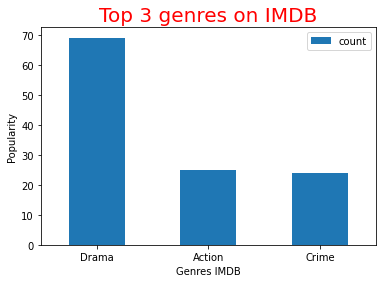

In [35]:
#Chart of Top 3 genres on IMDB

top_genres_imdb.plot(kind='bar')
plt.title('Top 3 genres on IMDB', color = 'red', size = '20')
plt.xticks(rotation=0)
plt.ylabel('Popularity')
plt.show()